In [1]:
# train a classical generative adversarial network on a gaussian probability distribution
import numpy as np
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [8]:
# define the standalone discriminator model
def define_discriminator(n_inputs=1):
    model = Sequential()
    model.add(Dense(15, activation='relu', input_dim=n_inputs))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=1):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=latent_dim))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(n_outputs, activation='tanh'))
    return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
 
# generate n real samples with class labels
def generate_real_samples(samples, sigma=0.25, mu=0.0):
    # generate samples from the distribution
    s = np.random.normal(mu, sigma, samples)
    # shape array
    X = s.reshape(samples, 1)
    # generate class labels
    y = np.ones((samples, 1))
    return X, y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, samples):
    # generate points in the latent space
    x_input = randn(latent_dim * samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(samples, latent_dim)
    return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, samples)
    # predict outputs
    X = generator.predict(x_input)
    # shape array
    X = X.reshape(samples, 1)
    # create class labels
    y = np.zeros((samples, 1))
    return X, y
 
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, samples, nbins):
    # prepare real samples
    x_real, y_real = generate_real_samples(samples)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, samples)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('epoch: ',epoch, 'acc_real: ', acc_real, 'acc_fake: ', acc_fake)
    # histogram plot real and fake data points
    pyplot.hist(x_real, np.linspace(-1.0, 1.0, nbins+1), color='red', label='real', alpha=0.5)
    pyplot.hist(x_fake, np.linspace(-1.0, 1.0, nbins+1), color='blue', label='fake', alpha=0.5)
    pyplot.legend()
    pyplot.show()
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=100000, samples=4000, nbins=20, n_eval=1000):
    # determine half the size of one batch, for updating the discriminator
    half_samples = int(samples / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_samples)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_samples)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, samples)
        # create inverted labels for the fake samples
        y_gan = np.ones((samples, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim, samples, nbins)

epoch:  999 acc_real:  0.7067499756813049 acc_fake:  0.17874999344348907


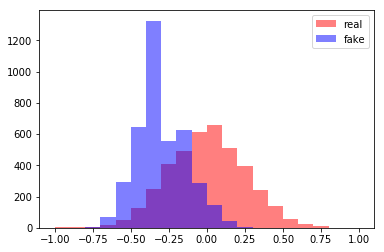

epoch:  1999 acc_real:  0.6812499761581421 acc_fake:  0.9894999861717224


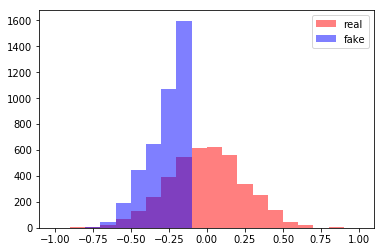

epoch:  2999 acc_real:  0.4242500066757202 acc_fake:  0.5630000233650208


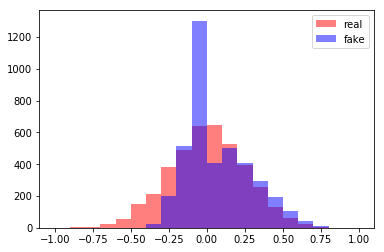

epoch:  3999 acc_real:  0.6447499990463257 acc_fake:  0.3632499873638153


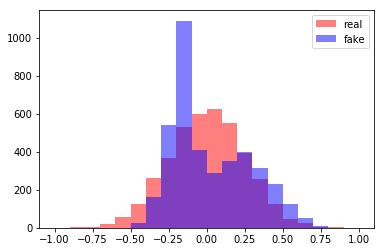

epoch:  4999 acc_real:  0.5715000033378601 acc_fake:  0.032749999314546585


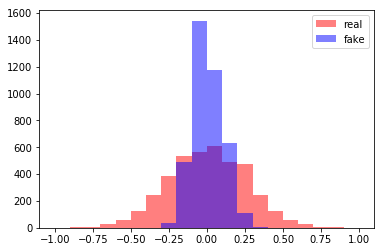

epoch:  5999 acc_real:  0.5297499895095825 acc_fake:  0.5354999899864197


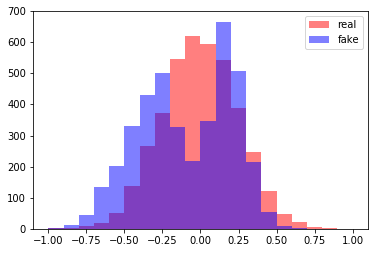

epoch:  6999 acc_real:  0.5149999856948853 acc_fake:  0.5617499947547913


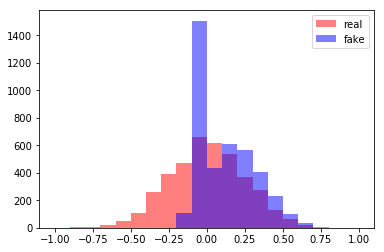

epoch:  7999 acc_real:  0.5427500009536743 acc_fake:  0.40674999356269836


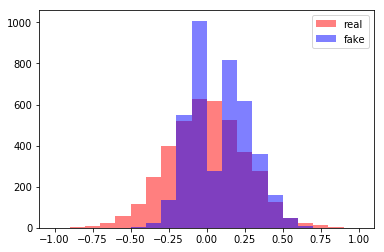

epoch:  8999 acc_real:  0.44850000739097595 acc_fake:  0.6165000200271606


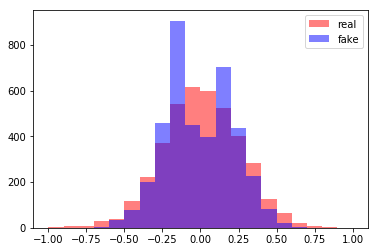

epoch:  9999 acc_real:  0.5055000185966492 acc_fake:  0.5557500123977661


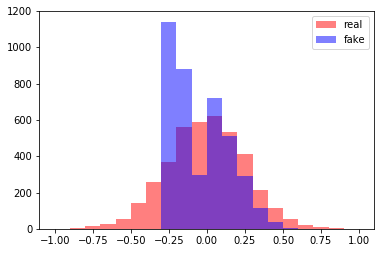

epoch:  10999 acc_real:  0.3892500102519989 acc_fake:  0.0


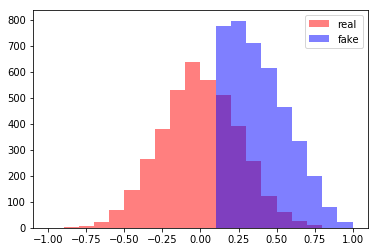

epoch:  11999 acc_real:  0.4345000088214874 acc_fake:  0.0


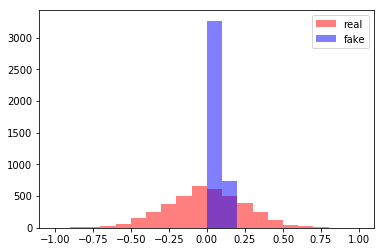

epoch:  12999 acc_real:  0.5690000057220459 acc_fake:  0.703499972820282


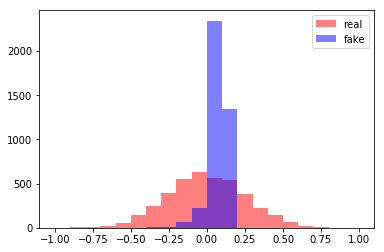

epoch:  13999 acc_real:  0.0677499994635582 acc_fake:  0.6230000257492065


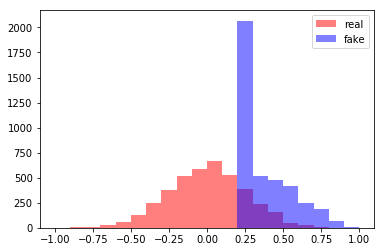

epoch:  14999 acc_real:  0.5454999804496765 acc_fake:  0.08874999731779099


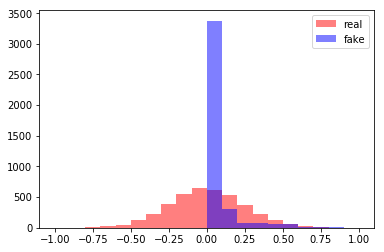

epoch:  15999 acc_real:  0.3817499876022339 acc_fake:  0.621999979019165


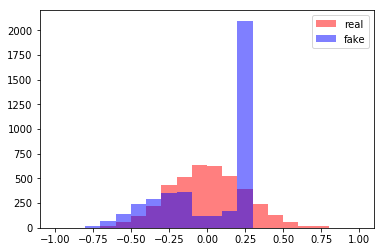

epoch:  16999 acc_real:  0.515749990940094 acc_fake:  0.8857499957084656


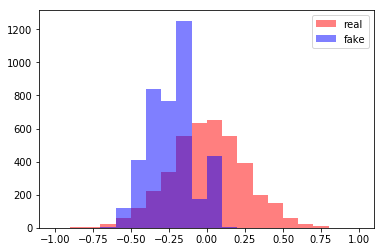

epoch:  17999 acc_real:  0.16324999928474426 acc_fake:  0.9994999766349792


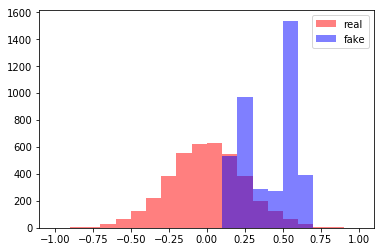

epoch:  18999 acc_real:  0.5132499933242798 acc_fake:  0.8585000038146973


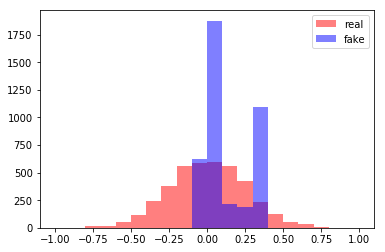

epoch:  19999 acc_real:  0.5702499747276306 acc_fake:  0.5257499814033508


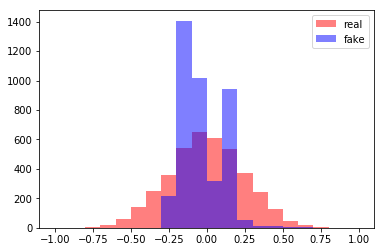

epoch:  20999 acc_real:  0.4830000102519989 acc_fake:  0.5145000219345093


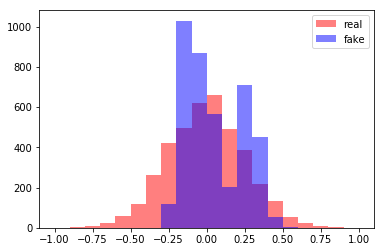

epoch:  21999 acc_real:  0.8927500247955322 acc_fake:  0.10750000178813934


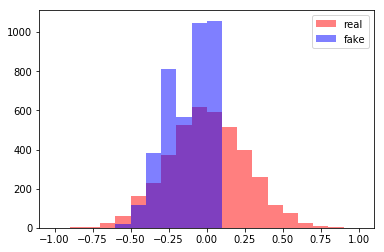

epoch:  22999 acc_real:  0.3792499899864197 acc_fake:  0.5677499771118164


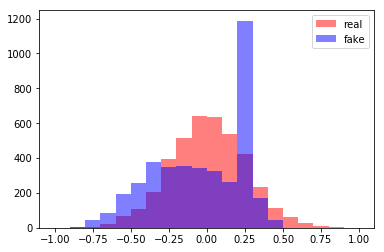

epoch:  23999 acc_real:  0.8927500247955322 acc_fake:  0.054249998182058334


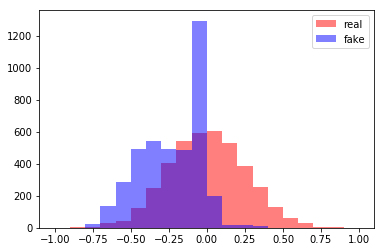

epoch:  24999 acc_real:  0.4724999964237213 acc_fake:  0.20149999856948853


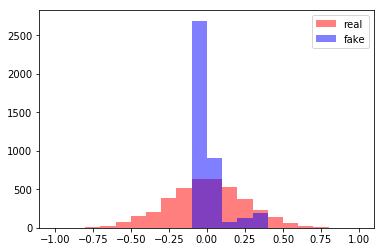

epoch:  25999 acc_real:  0.9384999871253967 acc_fake:  0.23250000178813934


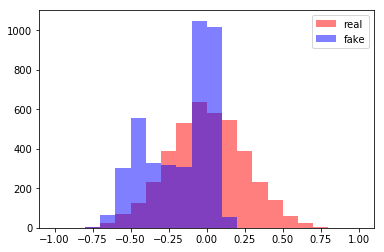

epoch:  26999 acc_real:  0.49924999475479126 acc_fake:  0.476500004529953


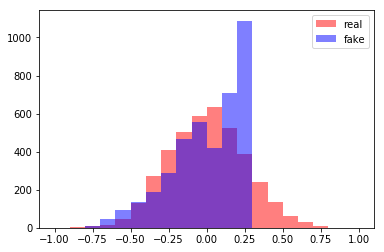

epoch:  27999 acc_real:  0.6334999799728394 acc_fake:  0.5115000009536743


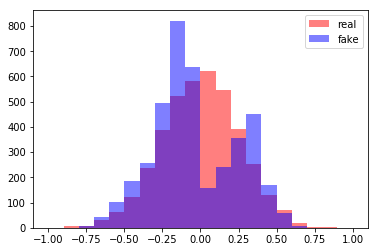

epoch:  28999 acc_real:  0.3697499930858612 acc_fake:  0.527999997138977


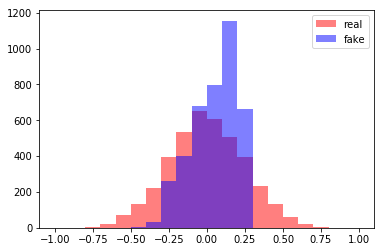

epoch:  29999 acc_real:  0.625 acc_fake:  0.6200000047683716


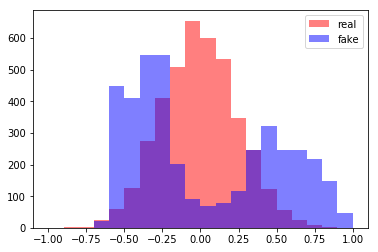

epoch:  30999 acc_real:  0.16699999570846558 acc_fake:  0.6022499799728394


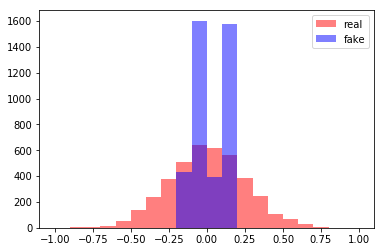

epoch:  31999 acc_real:  0.38975000381469727 acc_fake:  0.5277500152587891


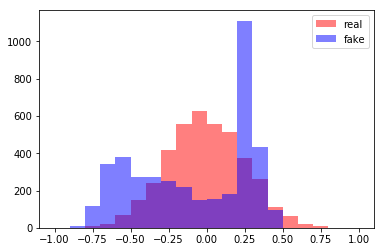

epoch:  32999 acc_real:  0.5382500290870667 acc_fake:  0.09849999845027924


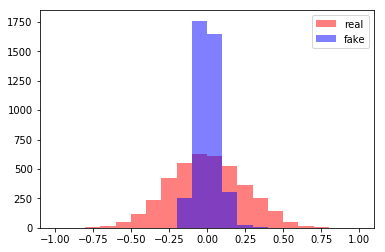

epoch:  33999 acc_real:  0.7427499890327454 acc_fake:  0.46775001287460327


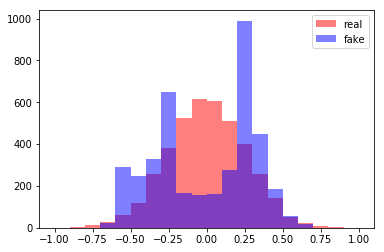

epoch:  34999 acc_real:  0.4657500088214874 acc_fake:  0.9957500100135803


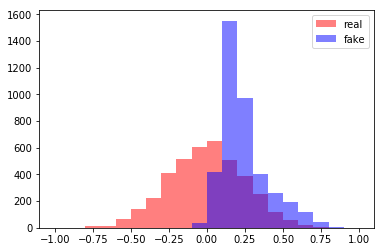

epoch:  35999 acc_real:  0.515999972820282 acc_fake:  0.5264999866485596


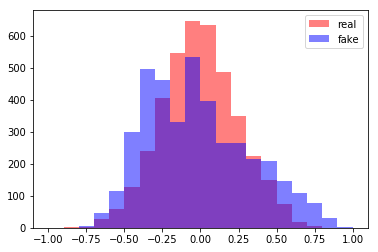

epoch:  36999 acc_real:  0.893750011920929 acc_fake:  0.12425000220537186


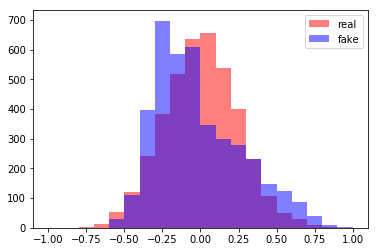

epoch:  37999 acc_real:  0.10724999755620956 acc_fake:  0.9950000047683716


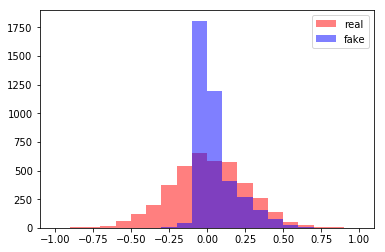

epoch:  38999 acc_real:  0.7607499957084656 acc_fake:  0.2997500002384186


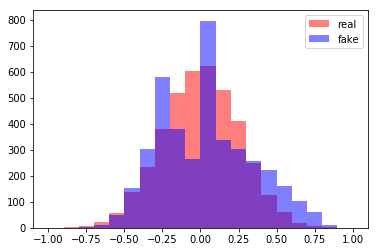

epoch:  39999 acc_real:  0.8787500262260437 acc_fake:  0.10975000262260437


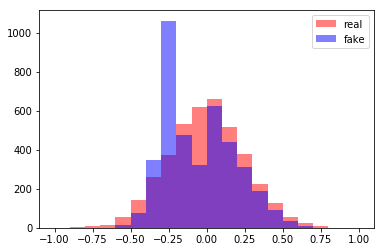

epoch:  40999 acc_real:  0.32749998569488525 acc_fake:  0.856249988079071


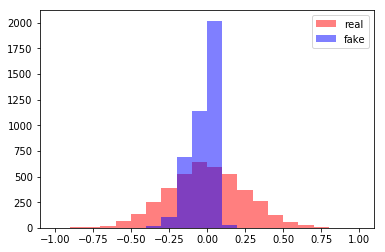

epoch:  41999 acc_real:  0.34450000524520874 acc_fake:  0.7197499871253967


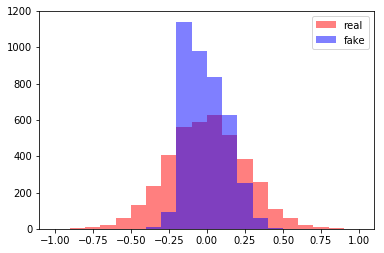

epoch:  42999 acc_real:  0.40799999237060547 acc_fake:  0.5080000162124634


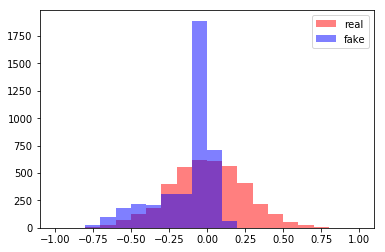

epoch:  43999 acc_real:  0.3812499940395355 acc_fake:  0.5920000076293945


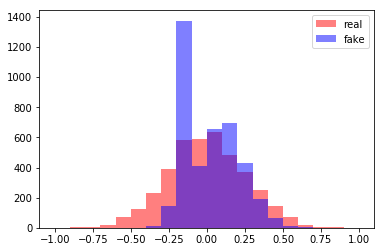

epoch:  44999 acc_real:  0.16975000500679016 acc_fake:  0.9422500133514404


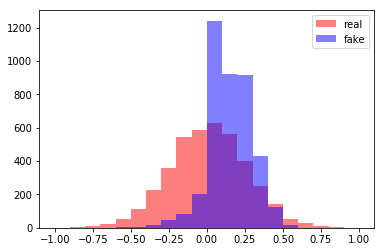

epoch:  45999 acc_real:  0.5625 acc_fake:  0.5397499799728394


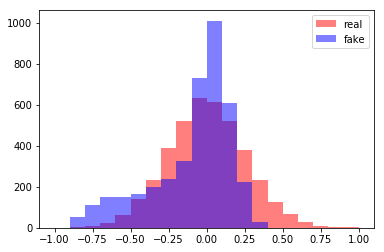

epoch:  46999 acc_real:  0.31150001287460327 acc_fake:  1.0


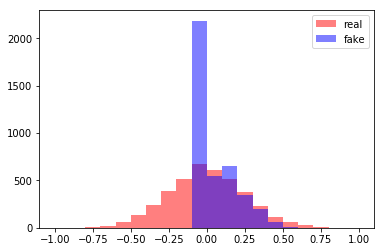

epoch:  47999 acc_real:  0.33149999380111694 acc_fake:  0.9225000143051147


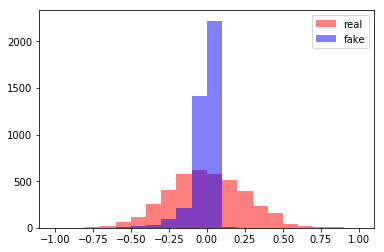

epoch:  48999 acc_real:  0.7960000038146973 acc_fake:  0.11275000125169754


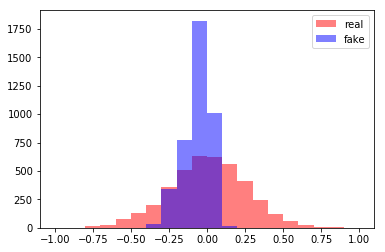

epoch:  49999 acc_real:  0.6082500219345093 acc_fake:  0.4429999887943268


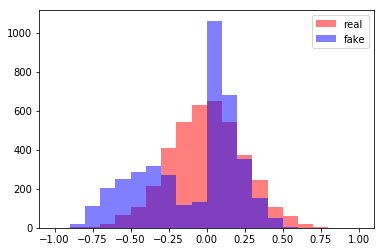

epoch:  50999 acc_real:  0.49549999833106995 acc_fake:  0.5142499804496765


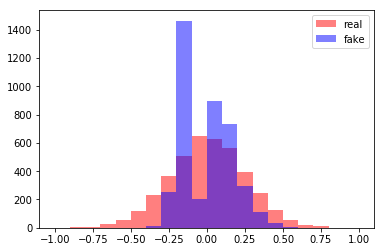

epoch:  51999 acc_real:  0.4727500081062317 acc_fake:  0.5377500057220459


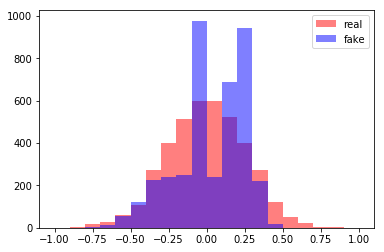

epoch:  52999 acc_real:  0.2345000058412552 acc_fake:  0.9772499799728394


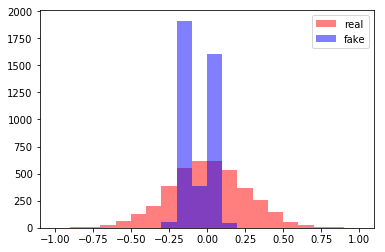

epoch:  53999 acc_real:  0.43024998903274536 acc_fake:  0.7409999966621399


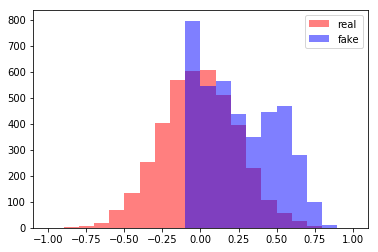

epoch:  54999 acc_real:  0.4189999997615814 acc_fake:  0.590499997138977


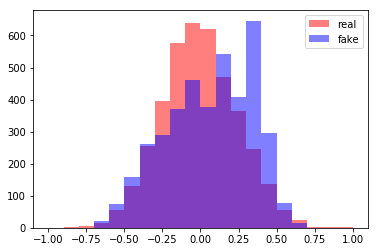

epoch:  55999 acc_real:  0.5102499723434448 acc_fake:  0.7124999761581421


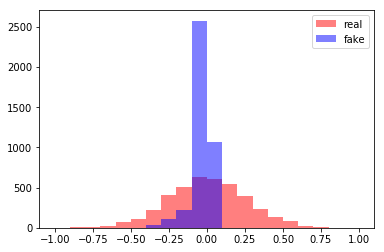

epoch:  56999 acc_real:  0.7149999737739563 acc_fake:  0.320250004529953


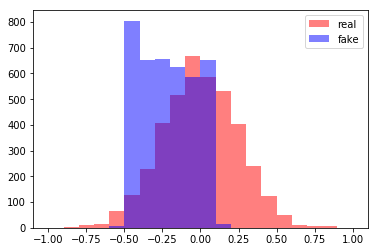

epoch:  57999 acc_real:  0.28700000047683716 acc_fake:  0.37299999594688416


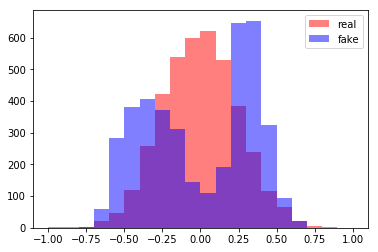

epoch:  58999 acc_real:  0.36000001430511475 acc_fake:  0.0


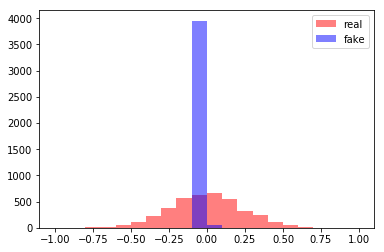

epoch:  59999 acc_real:  0.3619999885559082 acc_fake:  0.11474999785423279


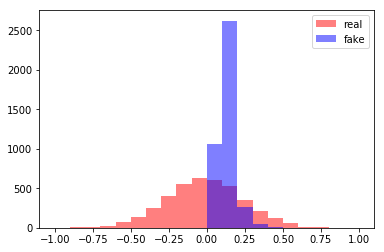

epoch:  60999 acc_real:  0.33774998784065247 acc_fake:  0.5537499785423279


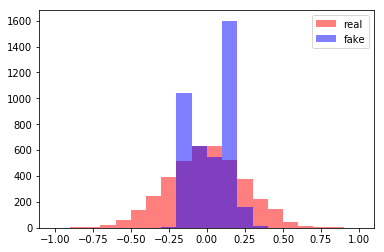

epoch:  61999 acc_real:  0.2639999985694885 acc_fake:  0.4790000021457672


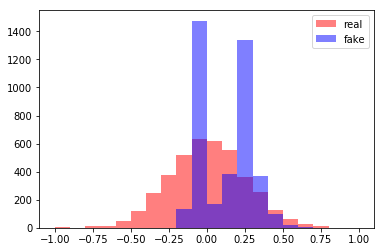

epoch:  62999 acc_real:  0.28824999928474426 acc_fake:  0.45500001311302185


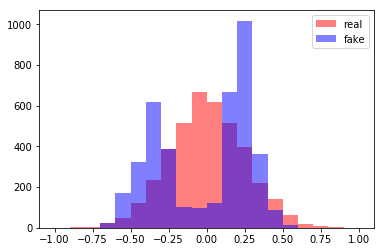

epoch:  63999 acc_real:  0.4284999966621399 acc_fake:  0.8037499785423279


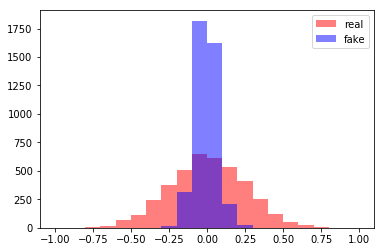

epoch:  64999 acc_real:  0.21975000202655792 acc_fake:  0.9629999995231628


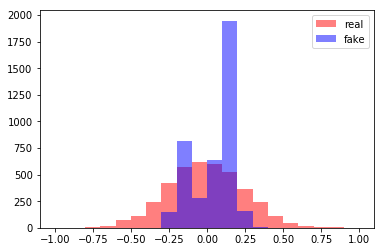

epoch:  65999 acc_real:  0.226500004529953 acc_fake:  1.0


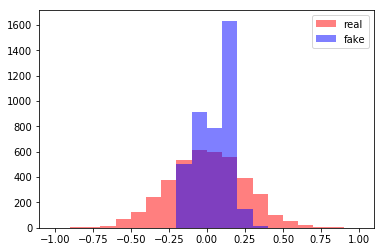

epoch:  66999 acc_real:  0.2759999930858612 acc_fake:  0.7950000166893005


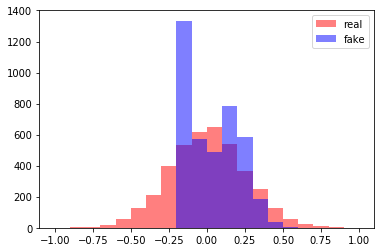

epoch:  67999 acc_real:  0.23399999737739563 acc_fake:  0.6065000295639038


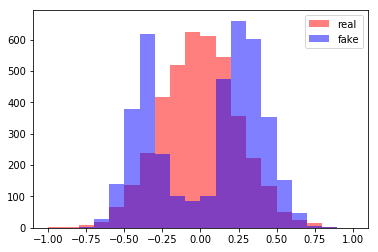

epoch:  68999 acc_real:  0.4932500123977661 acc_fake:  0.3935000002384186


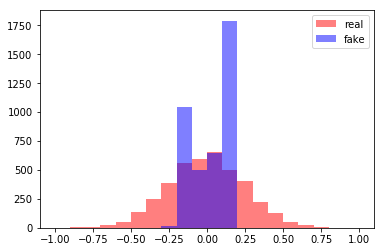

epoch:  69999 acc_real:  0.6464999914169312 acc_fake:  0.47049999237060547


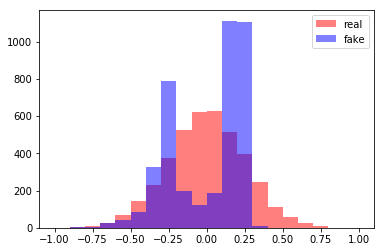

epoch:  70999 acc_real:  0.4359999895095825 acc_fake:  0.4762499928474426


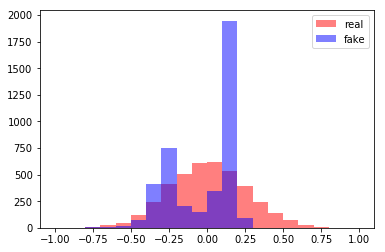

epoch:  71999 acc_real:  0.4232499897480011 acc_fake:  0.6690000295639038


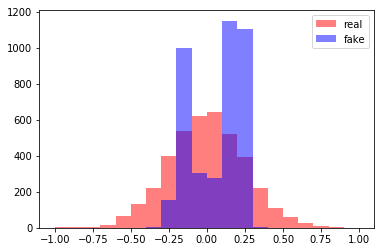

epoch:  72999 acc_real:  0.6399999856948853 acc_fake:  0.609749972820282


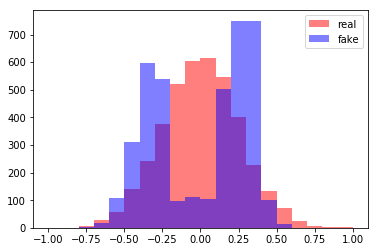

epoch:  73999 acc_real:  0.9010000228881836 acc_fake:  0.00800000037997961


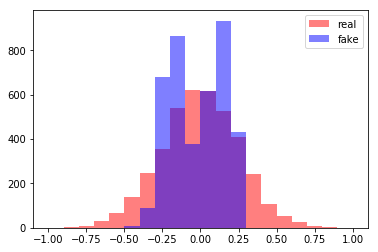

epoch:  74999 acc_real:  0.4997499883174896 acc_fake:  0.531499981880188


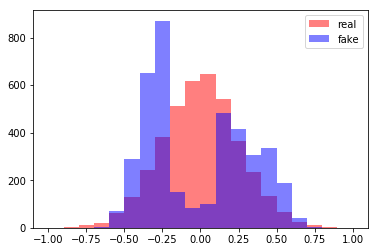

epoch:  75999 acc_real:  0.6460000276565552 acc_fake:  0.43549999594688416


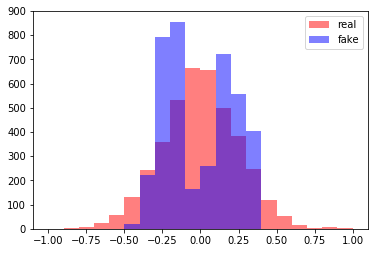

epoch:  76999 acc_real:  0.4025000035762787 acc_fake:  0.46050000190734863


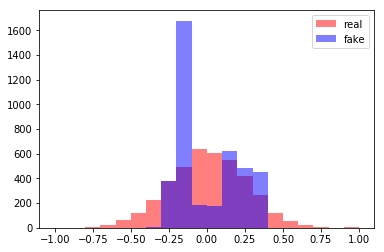

epoch:  77999 acc_real:  0.4762499928474426 acc_fake:  0.6455000042915344


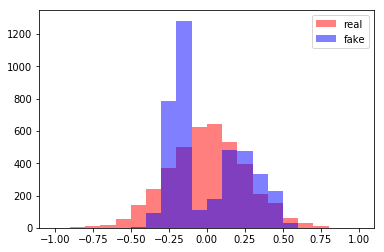

KeyboardInterrupt: 

In [9]:
# size of the latent space
latent_dim = 1
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)